In [1]:
import tensorflow as tf
tf.__version__
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline

In [2]:
image_filenames = glob.glob('./dataset/dc/train/*.jpg')

In [3]:
image_filenames = np.random.permutation(image_filenames)

In [4]:
labels = list(map(lambda x: float(x.split('\\')[1].split('.')[0] == 'cat'), image_filenames))

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, labels))

In [6]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.float32)>

In [7]:
def _pre_read(img_filename, label):
    img = tf.io.read_file(img_filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.resize(img, (200, 200))
    img = tf.image.per_image_standardization(img)  # 归一
    label = tf.reshape(label, [1])
    return img, label

In [8]:
dataset = dataset.map(_pre_read)

W0721 18:30:35.573298 19220 deprecation.py:323] From D:\Python\Anaconda3\lib\site-packages\tensorflow\python\ops\image_ops_impl.py:1511: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [9]:
dataset = dataset.shuffle(300).repeat().batch(32)

In [10]:
dataset

<BatchDataset shapes: ((None, 200, 200, 1), (None, 1)), types: (tf.float32, tf.float32)>

In [11]:
test_filenames = np.random.permutation(glob.glob('./dataset/dc/test/*.jpg'))
test_labels = list(map(lambda x: float(x.split('\\')[1].split('.')[0] == 'cat'), test_filenames))
ds_test = tf.data.Dataset.from_tensor_slices((test_filenames, test_labels))
ds_test = ds_test.map(_pre_read).batch(32)
ds_test

<BatchDataset shapes: ((None, 200, 200, 1), (None, 1)), types: (tf.float32, tf.float32)>

In [12]:
model = keras.Sequential()

In [13]:
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['acc']
)

In [17]:
model.fit(dataset, epochs=30, steps_per_epoch=int(len(image_filenames) // 32), validation_data=ds_test, validation_steps=int(len(test_filenames) // 32))

Epoch 1/30


W0721 18:31:30.471135 19220 deprecation.py:323] From D:\Python\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


781/781 [==============================] - 114s 146ms/step - loss: 0.5432 - acc: 0.7202 - val_loss: 0.8859 - val_acc: 0.5192
Epoch 2/30
781/781 [==============================] - 104s 133ms/step - loss: 0.4068 - acc: 0.8132 - val_loss: 1.1627 - val_acc: 0.5418
Epoch 3/30
781/781 [==============================] - 106s 135ms/step - loss: 0.3197 - acc: 0.8584 - val_loss: 1.6028 - val_acc: 0.4966
Epoch 4/30
781/781 [==============================] - 104s 133ms/step - loss: 0.2163 - acc: 0.9073 - val_loss: 2.3333 - val_acc: 0.5472
Epoch 5/30
781/781 [==============================] - 104s 133ms/step - loss: 0.1315 - acc: 0.9486 - val_loss: 3.2329 - val_acc: 0.4873
Epoch 6/30
781/781 [==============================] - 104s 133ms/step - loss: 0.0847 - acc: 0.9667 - val_loss: 4.0892 - val_acc: 0.4806
Epoch 7/30
781/781 [==============================] - 104s 133ms/step - loss: 0.0710 - acc: 0.9746 - val_loss: 3.8591 - val_acc: 0.5272
Epoch 8/30
781/781 [==============================] - 104s 

In [ ]:
model.history.history.get('loss')

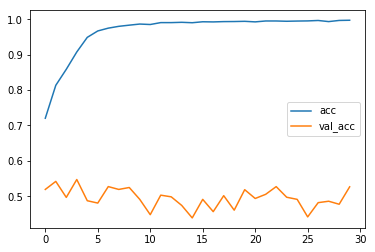

In [18]:
plt.plot(model.history.epoch, model.history.history.get('acc'), label='acc')
plt.plot(model.history.epoch, model.history.history.get('val_acc'), label='val_acc')
plt.legend()

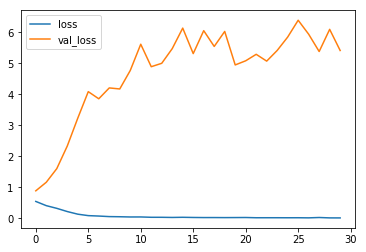

In [19]:
plt.plot(model.history.epoch, model.history.history.get('loss'), label='loss')
plt.plot(model.history.epoch, model.history.history.get('val_loss'), label='val_loss')
plt.legend()